In [1]:
%load_ext lab_black

# GMM

In [2]:
import os

os.chdir("../..")

In [3]:
import pandas as pd

from sklearn.mixture import GaussianMixture
from utils.read_final_data import read_train_test_data
from utils.visualisation import (
    plot_clustering,
    plot_clustering_from_clusters,
)
from utils.cluster_summary import get_cluster_summary

pd.options.display.float_format = "{:,.2f}".format

In [4]:
X_train, X_test = read_train_test_data()
df_train, df_test = (
    pd.read_pickle("resources/data/train_data.pkl"),
    pd.read_pickle("resources/data/test_data.pkl"),
)
train_clusters = df_train.label
test_clusters = df_test.label

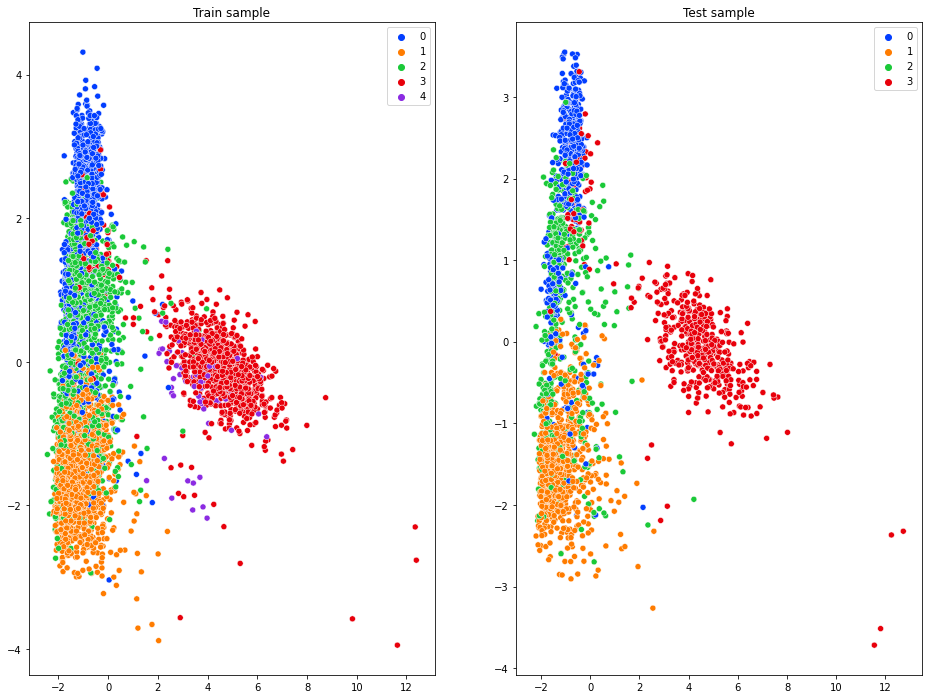

In [5]:
gmm = GaussianMixture(n_components=5, covariance_type="full", random_state=7456)

plot_clustering(gmm, X_train, X_test)

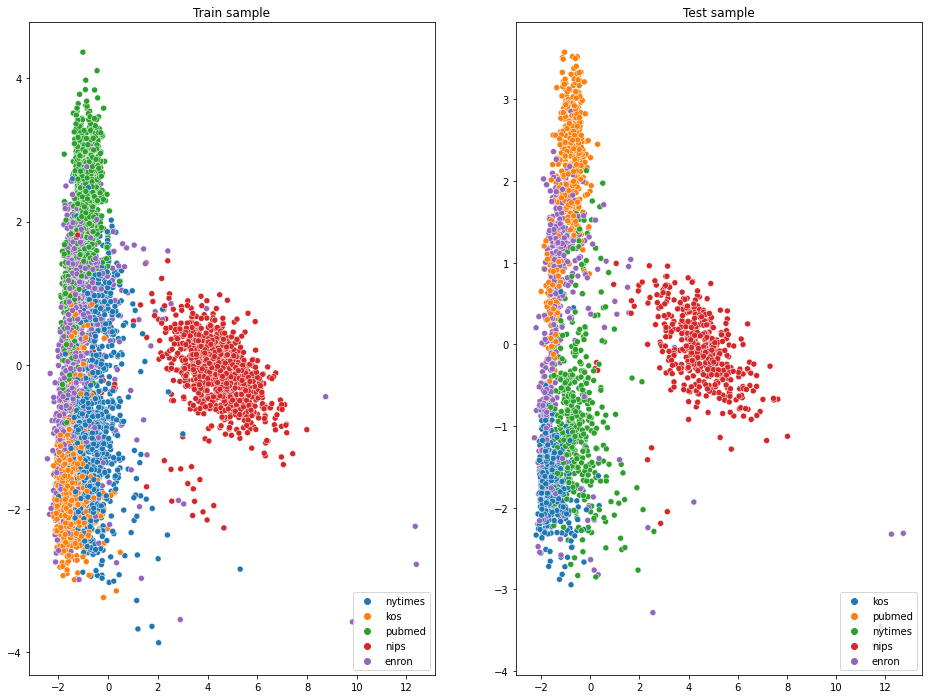

In [6]:
plot_clustering_from_clusters(X_train, X_test, train_clusters, test_clusters)

In [7]:
gmm.fit(X_train)
df_train = df_train.assign(pred=gmm.predict(X_train))
df_test = df_test.assign(pred=gmm.predict(X_test))

In [8]:
get_cluster_summary(df_train)

size                         
label enron  kos nips nytimes pubmed
pred                                
0      0.05 0.08 0.01    0.16   0.89
1      0.06 0.92 0.00    0.55   0.01
2      0.87 0.01 0.00    0.29   0.02
3      0.01 0.00 0.92    0.00   0.09
4      0.00 0.00 0.07    0.00   0.00

In [9]:
get_cluster_summary(df_test)

size                         
label enron  kos nips nytimes pubmed
pred                                
0      0.02 0.02 0.01    0.11   0.86
1      0.10 0.97 0.00    0.65   0.01
2      0.86 0.01 0.00    0.24   0.01
3      0.02 0.00 0.99    0.00   0.11